In [1]:
import pandas as pd
df_loan=pd.read_csv("https://raw.githubusercontent.com/ind-kum/DSData/master/loan_prediction.csv")
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2]:
#Lets chcek the null values 
for col in df_loan.columns:
    print("Column data type :",df_loan[col].dtype," column name :",col," Null values: ",df_loan[col].isnull().sum())
#Below o/p shows presense of null values in each column

Column data type : object  column name : Loan_ID  Null values:  0
Column data type : object  column name : Gender  Null values:  13
Column data type : object  column name : Married  Null values:  3
Column data type : object  column name : Dependents  Null values:  15
Column data type : object  column name : Education  Null values:  0
Column data type : object  column name : Self_Employed  Null values:  32
Column data type : int64  column name : ApplicantIncome  Null values:  0
Column data type : float64  column name : CoapplicantIncome  Null values:  0
Column data type : float64  column name : LoanAmount  Null values:  22
Column data type : float64  column name : Loan_Amount_Term  Null values:  14
Column data type : float64  column name : Credit_History  Null values:  50
Column data type : object  column name : Property_Area  Null values:  0
Column data type : object  column name : Loan_Status  Null values:  0


In [3]:
#Lets check the corrrelation matrix
df_loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [4]:
#Lets describe the dataset
df_loan.describe()
#there is difference between mean value and median so there can outliers present in the data set

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


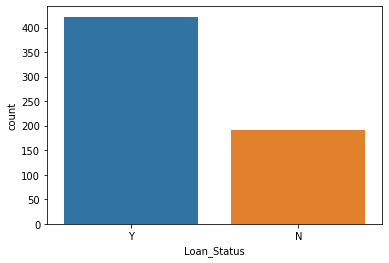

In [5]:
#Lets chcek the count of each type of class in loan status 
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="Loan_Status",data=df_loan)
plt.show()
#imbalanced dataset problem so we can use SMOTE just to increase instances of minority classes in training dataset

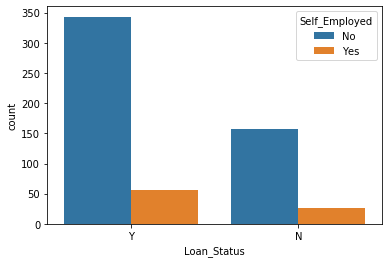

In [6]:
#lets check the count of loan status considering "Self_Employed"
sns.countplot(x="Loan_Status",hue="Self_Employed",data=df_loan)
plt.show()

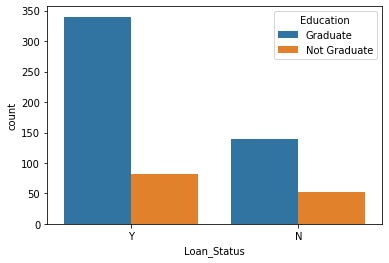

In [7]:
#Lets check the count based on "Education"
sns.countplot(x="Loan_Status",hue="Education",data=df_loan)
plt.show()
#people who are graduated has tendency of getting loans than who are not

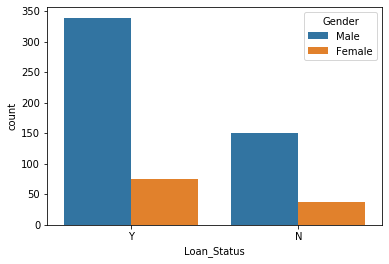

In [8]:
#lets chcek loan status based on gender
sns.countplot(x="Loan_Status",hue="Gender",data=df_loan)
plt.show()
#there are more number of males applying fro the loans comapred to female

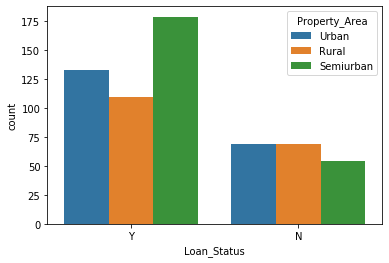

In [9]:
#lets chcek the loan status based on property area
sns.countplot(x="Loan_Status",hue="Property_Area",data=df_loan)
plt.show()

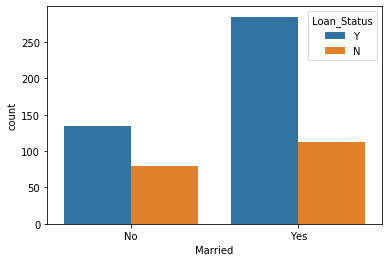

In [10]:
#Lets chcek the count based on marital status
sns.countplot(x="Married",hue="Loan_Status",data=df_loan)
plt.show()
#ration of people geting loans to not getting loans when they are married is high

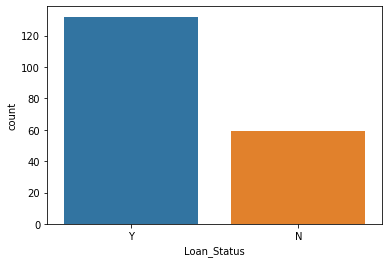

In [11]:
#Lets chcek loan status for applicant income greater than 5000
sns.countplot(x="Loan_Status",data=df_loan.loc[df_loan["ApplicantIncome"]>5000])
plt.show()
#people whose loan was sanctioned are more than double of prople whose loan was not sanctioned

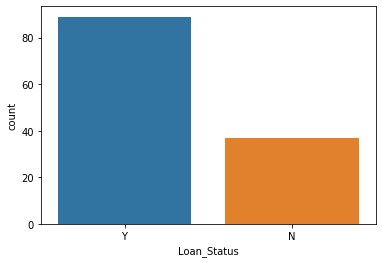

In [12]:
#Lets chcek what is the effect on above count if co-aplicant income is 0
sns.countplot(x="Loan_Status",data=df_loan.loc[(df_loan["ApplicantIncome"]>5000)&(df_loan["CoapplicantIncome"]==0)])
plt.show()
#count reduced but still ratio is almost same

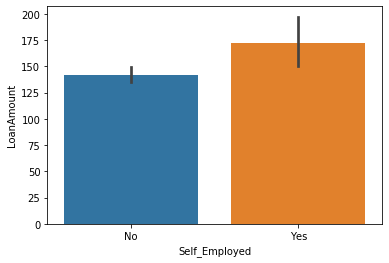

In [13]:
#lets compare the average loan amount between self employed and not self employed
sns.barplot(y="LoanAmount",x="Self_Employed",data=df_loan)
plt.show()
#avaerge loan amount demanded by the self employed is more but there is not too much difference

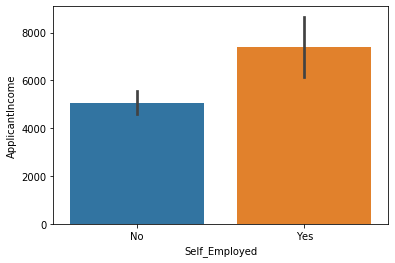

In [14]:
#Lets compare the average income of employed and self employed
sns.barplot(y="ApplicantIncome",x="Self_Employed",data=df_loan)
plt.show()
#Average income is also

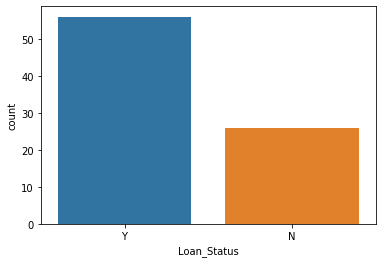

In [15]:
#Lets compare the count of people who got loans and who didn't
sns.countplot(x="Loan_Status",data=df_loan.loc[df_loan["Self_Employed"]=="Yes"])
plt.show()
#there are more than double who got loan
#next step is to compare the average income of people who got loan and who didn't ,given they are self employed

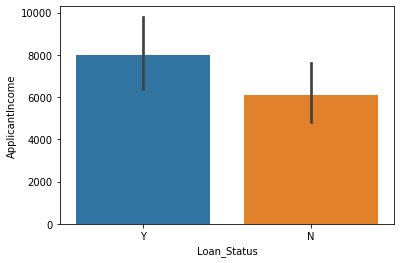

In [16]:
sns.barplot(y="ApplicantIncome",x="Loan_Status",data=df_loan.loc[df_loan["Self_Employed"]=="Yes"])
plt.show()
#So people who got loan has averge income more and it is expected

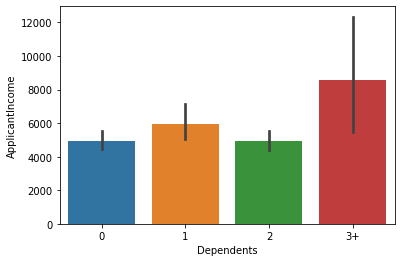

In [17]:
# let's chcek the average loan amount as per Dependents
sns.barplot(y="ApplicantIncome",x="Dependents",data=df_loan)
plt.show()
#Average income of dependents of with 2 is less than with 1

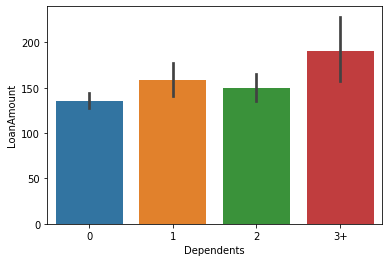

In [18]:
#lets chcek the average loan amount requested
sns.barplot(y="LoanAmount",x="Dependents",data=df_loan)
plt.show()
#Averge loan amount by person with dependents more 3 is highest

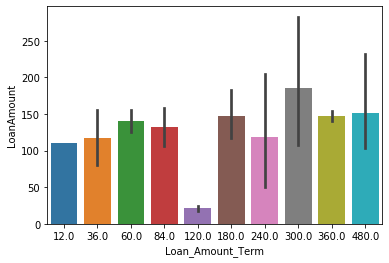

In [19]:
#Average loan amount requested groupped by Loan_Amount_Term
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df_loan)

In [20]:
#we have seen there are null values  
for col in df_loan.columns:
    print("Column data type :",df_loan[col].dtype," column name :",col," Null values: ",df_loan[col].isnull().sum())

Column data type : object  column name : Loan_ID  Null values:  0
Column data type : object  column name : Gender  Null values:  13
Column data type : object  column name : Married  Null values:  3
Column data type : object  column name : Dependents  Null values:  15
Column data type : object  column name : Education  Null values:  0
Column data type : object  column name : Self_Employed  Null values:  32
Column data type : int64  column name : ApplicantIncome  Null values:  0
Column data type : float64  column name : CoapplicantIncome  Null values:  0
Column data type : float64  column name : LoanAmount  Null values:  22
Column data type : float64  column name : Loan_Amount_Term  Null values:  14
Column data type : float64  column name : Credit_History  Null values:  50
Column data type : object  column name : Property_Area  Null values:  0
Column data type : object  column name : Loan_Status  Null values:  0


In [21]:
#lets impute the object datatype columns by mode groupped by same target class
for col in df_loan.columns:
    if df_loan[col].dtype=="object" and df_loan[col].isnull().sum()>0:
        df_loan.loc[df_loan["Loan_Status"]=="Y",[col]]=df_loan.loc[df_loan["Loan_Status"]=="Y",[col]].fillna(df_loan.loc[df_loan["Loan_Status"]=="Y",[col]].mode().iloc[0])
        df_loan.loc[df_loan["Loan_Status"]=="N",[col]]=df_loan.loc[df_loan["Loan_Status"]=="N",[col]].fillna(df_loan.loc[df_loan["Loan_Status"]=="N",[col]].mode().iloc[0])

In [22]:
#Lets again chcek the null values
df_loan.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
#Loan amount can be imputed by mean grouped by classes
df_loan.loc[df_loan["Loan_Status"]=="Y",["LoanAmount"]]=df_loan.loc[df_loan["Loan_Status"]=="Y",["LoanAmount"]].fillna(df_loan.loc[df_loan["Loan_Status"]=="Y",["LoanAmount"]].mean())
df_loan.loc[df_loan["Loan_Status"]=="N",["LoanAmount"]]=df_loan.loc[df_loan["Loan_Status"]=="N",["LoanAmount"]].fillna(df_loan.loc[df_loan["Loan_Status"]=="N",["LoanAmount"]].mean())

In [24]:
#lets chcek Null values again
df_loan.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
#Lets impute rest of the columns with mode as they seem to be of categorical type
for col in df_loan.columns:
    if df_loan[col].isnull().sum()>0:
        df_loan.loc[df_loan["Loan_Status"]=="Y",[col]]=df_loan.loc[df_loan["Loan_Status"]=="Y",[col]].fillna(df_loan.loc[df_loan["Loan_Status"]=="Y",[col]].mode().iloc[0])
        df_loan.loc[df_loan["Loan_Status"]=="N",[col]]=df_loan.loc[df_loan["Loan_Status"]=="N",[col]].fillna(df_loan.loc[df_loan["Loan_Status"]=="N",[col]].mode().iloc[0])

In [26]:
#lets again check null values
df_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
#lets check the skewness of the dataset
df_loan.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.724592
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [28]:
#dividing it into input and output
df_x=df_loan.drop(columns=["Loan_Status"])
y=df_loan[["Loan_Status"]]

In [29]:
import numpy as np
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.55:
        df_x[index]=np.log1p(df_x[index])

In [30]:
#lets chcek the skewness
df_x.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.181343
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [31]:
#Lets chcek the datatypes in input dataset
df_x.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [32]:
#we can delete loan id as it has no significance in prediction
df_x.drop(columns=["Loan_ID"],inplace=True)

In [33]:
df_x=pd.get_dummies(df_x,drop_first=True)

In [34]:
#Lets chcek the shape
df_x.shape

(614, 14)

In [35]:
#lets bring all features to a common scale using
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [36]:
#lets use labelencoder to convert target class into integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [37]:
#since it is imbalanced dataset so we will focus on auc-roc score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [38]:
#Lets use logistic regression and check
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
max_aucroc_score(lg_clf,x,y)

auc roc score corresponding to  42  is  0.8345201238390093
auc roc score corresponding to  43  is  0.6970588235294117
auc roc score corresponding to  44  is  0.6925696594427245
auc roc score corresponding to  45  is  0.7057275541795665
auc roc score corresponding to  46  is  0.6911764705882353
auc roc score corresponding to  47  is  0.6631578947368422
auc roc score corresponding to  48  is  0.6544891640866873
auc roc score corresponding to  49  is  0.7230650154798761
auc roc score corresponding to  50  is  0.6631578947368422
auc roc score corresponding to  51  is  0.6777089783281733
auc roc score corresponding to  52  is  0.6804953560371517
auc roc score corresponding to  53  is  0.664860681114551
auc roc score corresponding to  54  is  0.7088235294117646
auc roc score corresponding to  55  is  0.7247678018575852
auc roc score corresponding to  56  is  0.6281733746130032
auc roc score corresponding to  57  is  0.6852941176470588
auc roc score corresponding to  58  is  0.657585139318885

42

In [39]:
#lets chcek decision tree
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,df_x,y)

auc roc score corresponding to  42  is  0.756656346749226
auc roc score corresponding to  43  is  0.6939628482972137
auc roc score corresponding to  44  is  0.5794117647058823
auc roc score corresponding to  45  is  0.6278637770897834
auc roc score corresponding to  46  is  0.719969040247678
auc roc score corresponding to  47  is  0.6763157894736842
auc roc score corresponding to  48  is  0.6351393188854488
auc roc score corresponding to  49  is  0.6424148606811146
auc roc score corresponding to  50  is  0.6586687306501546
auc roc score corresponding to  51  is  0.6718266253869969
auc roc score corresponding to  52  is  0.6278637770897834
auc roc score corresponding to  53  is  0.7099071207430339
auc roc score corresponding to  54  is  0.6760061919504644
auc roc score corresponding to  55  is  0.668421052631579
auc roc score corresponding to  56  is  0.6441176470588235
auc roc score corresponding to  57  is  0.7012383900928792
auc roc score corresponding to  58  is  0.5942724458204334


42

In [40]:
#lets use random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'n_estimators': 500}

In [41]:
rf_clf=RandomForestClassifier(n_estimators=500)
max_aucroc_score(rf_clf,df_x,y)

auc roc score corresponding to  42  is  0.7729102167182663
auc roc score corresponding to  43  is  0.6693498452012383
auc roc score corresponding to  44  is  0.6735294117647059
auc roc score corresponding to  45  is  0.6662538699690402
auc roc score corresponding to  46  is  0.7261609907120743
auc roc score corresponding to  47  is  0.7057275541795665
auc roc score corresponding to  48  is  0.6707430340557275
auc roc score corresponding to  49  is  0.7510835913312693
auc roc score corresponding to  50  is  0.6544891640866873
auc roc score corresponding to  51  is  0.7026315789473685
auc roc score corresponding to  52  is  0.7292569659442724
auc roc score corresponding to  53  is  0.7088235294117646
auc roc score corresponding to  54  is  0.698452012383901
auc roc score corresponding to  55  is  0.7597523219814242
auc roc score corresponding to  56  is  0.651702786377709
auc roc score corresponding to  57  is  0.6897832817337461
auc roc score corresponding to  58  is  0.6385448916408669

82

In [42]:
#Lets use KNN
#For KNN we need to know the best value of k using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 29}

In [43]:
kc=KNeighborsClassifier(n_neighbors=29)
max_aucroc_score(kc,x,y)

auc roc score corresponding to  42  is  0.7465944272445821
auc roc score corresponding to  43  is  0.7043343653250774
auc roc score corresponding to  44  is  0.6939628482972137
auc roc score corresponding to  45  is  0.721671826625387
auc roc score corresponding to  46  is  0.7143962848297213
auc roc score corresponding to  47  is  0.6808049535603716
auc roc score corresponding to  48  is  0.6354489164086687
auc roc score corresponding to  49  is  0.6835913312693498
auc roc score corresponding to  50  is  0.6586687306501546
auc roc score corresponding to  51  is  0.6981424148606811
auc roc score corresponding to  52  is  0.646594427244582
auc roc score corresponding to  53  is  0.6970588235294117
auc roc score corresponding to  54  is  0.6998452012383901
auc roc score corresponding to  55  is  0.7348297213622291
auc roc score corresponding to  56  is  0.6181114551083591
auc roc score corresponding to  57  is  0.6690402476780186
auc roc score corresponding to  58  is  0.6970588235294117

42

In [44]:
#Lets use SVM
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'C': 0.01, 'kernel': 'rbf'}

In [45]:
svc=SVC(kernel="rbf",C=0.01)
max_aucroc_score(svc,x,y)

auc roc score corresponding to  42  is  0.7760061919504644
auc roc score corresponding to  43  is  0.6253869969040248
auc roc score corresponding to  44  is  0.7001547987616099
auc roc score corresponding to  45  is  0.7424148606811145
auc roc score corresponding to  46  is  0.678328173374613
auc roc score corresponding to  47  is  0.7320433436532507
auc roc score corresponding to  48  is  0.625077399380805
auc roc score corresponding to  49  is  0.7777089783281734
auc roc score corresponding to  50  is  0.6987616099071208
auc roc score corresponding to  51  is  0.7026315789473685
auc roc score corresponding to  52  is  0.6334365325077399
auc roc score corresponding to  53  is  0.6928792569659443
auc roc score corresponding to  54  is  0.7046439628482972
auc roc score corresponding to  55  is  0.7334365325077399
auc roc score corresponding to  56  is  0.6256965944272446
auc roc score corresponding to  57  is  0.6724458204334366
auc roc score corresponding to  58  is  0.5693498452012384

99

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 500}

In [47]:
gb_clf=GradientBoostingClassifier(learning_rate=0.001,n_estimators=500)
max_aucroc_score(gb_clf,df_x,y)

auc roc score corresponding to  42  is  0.7379256965944272
auc roc score corresponding to  43  is  0.6738390092879256
auc roc score corresponding to  44  is  0.698452012383901
auc roc score corresponding to  45  is  0.7410216718266254
auc roc score corresponding to  46  is  0.6856037151702786
auc roc score corresponding to  47  is  0.6956656346749226
auc roc score corresponding to  48  is  0.6651702786377709
auc roc score corresponding to  49  is  0.7351393188854488
auc roc score corresponding to  50  is  0.6869969040247678
auc roc score corresponding to  51  is  0.7247678018575852
auc roc score corresponding to  52  is  0.7102167182662539
auc roc score corresponding to  53  is  0.6956656346749226
auc roc score corresponding to  54  is  0.7088235294117646
auc roc score corresponding to  55  is  0.7219814241486069
auc roc score corresponding to  56  is  0.613312693498452
auc roc score corresponding to  57  is  0.6866873065015481
auc roc score corresponding to  58  is  0.6226006191950464

99

In [48]:
#Lets use ada boosting using decision tree as an estimator
from sklearn.ensemble import AdaBoostClassifier
#parameters={"base_estimator":[dc,lg_clf,svc],"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
ada_clf=AdaBoostClassifier(base_estimator=dc)
max_aucroc_score(ada_clf,df_x,y)

auc roc score corresponding to  42  is  0.8006191950464396
auc roc score corresponding to  43  is  0.6690402476780186
auc roc score corresponding to  44  is  0.6205882352941177
auc roc score corresponding to  45  is  0.7171826625386997
auc roc score corresponding to  46  is  0.6922600619195046
auc roc score corresponding to  47  is  0.6877708978328174
auc roc score corresponding to  48  is  0.6558823529411765
auc roc score corresponding to  49  is  0.7054179566563468
auc roc score corresponding to  50  is  0.7040247678018576
auc roc score corresponding to  51  is  0.6804953560371517
auc roc score corresponding to  52  is  0.6791021671826625
auc roc score corresponding to  53  is  0.7012383900928792
auc roc score corresponding to  54  is  0.6379256965944272
auc roc score corresponding to  55  is  0.6863777089783282
auc roc score corresponding to  56  is  0.5959752321981424
auc roc score corresponding to  57  is  0.5693498452012384
auc roc score corresponding to  58  is  0.57213622291021

42

In [49]:
#lets use cross_val_score for logistic regression
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for logistic classifier:  0.7682755153343389
standard deviation in roc auc score for logistic classifier:  0.054104400479102574
[0.82012384 0.70928793 0.77777778 0.83180708 0.70238095]


In [50]:
#lets use cross_val_score for decision tree
print("Mean auc roc score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc"))

Mean auc roc score for decision tree classifier:  0.6832272423139296
standard deviation in auc roc score for decision tree classifier:  0.0376152830752894
[0.71888545 0.55479876 0.66208791 0.72710623 0.64786967]


In [51]:
#lets check cross_val_score for random forest
print("Mean auc roc score for random forest classifier: ",cross_val_score(rf_clf,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for random forest classifier: ",cross_val_score(rf_clf,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(rf_clf,df_x,y,cv=5,scoring="roc_auc"))

Mean auc roc score for random forest classifier:  0.7784919406359034
standard deviation in auc roc score for random forest classifier:  0.03133814856776633
[0.79643963 0.74473684 0.79059829 0.82905983 0.75971178]


In [52]:
#lets use cross_val_score for knn 
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for knn classifier: ",cross_val_score(kc,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for knn classifier: ",cross_val_score(kc,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(kc,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for knn classifier:  0.7491623761515402
standard deviation in roc auc score for knn classifier:  0.02936681724044758
[0.75990712 0.72414861 0.74053724 0.80082418 0.72039474]


In [53]:
#lets use cross_val_score for svm
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for svm classifier: ",cross_val_score(svc,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for svm classifier: ",cross_val_score(svc,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(svc,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for svm classifier:  0.7516992329995427
standard deviation in roc auc score for svm classifier:  0.0389316591287871
[0.73839009 0.70650155 0.79120879 0.80372405 0.71867168]


In [54]:
#lets check cross_val_score for gradient boosting
print("Mean auc roc score for gradient boosting classifier: ",cross_val_score(gb_clf,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for gradient boosting classifier: ",cross_val_score(gb_clf,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(gb_clf,df_x,y,cv=5,scoring="roc_auc"))

Mean auc roc score for gradient boosting classifier:  0.7548620419827851
standard deviation in auc roc score for gradient boosting classifier:  0.07344431188808453
[0.78018576 0.64334365 0.73427961 0.87057387 0.74592732]


In [57]:
# we will use random forest as our final model
# random state 82
x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = 82,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
rf_clf=RandomForestClassifier(n_estimators=500)
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[20 18]
 [ 4 81]]
f1 score is :  0.8804347826086957
classification report 
               precision    recall  f1-score   support

           0       0.83      0.53      0.65        38
           1       0.82      0.95      0.88        85

    accuracy                           0.82       123
   macro avg       0.83      0.74      0.76       123
weighted avg       0.82      0.82      0.81       123

AUC ROC Score:  0.7396284829721362
